#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

## Στον παρακάτω πίνακα παρουσιάζονται τα επίπεδα, το μέγεθος των φίλτρων,η συνάρτηση ενεργοποίησης, το πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα δοθεντα άρθρα

| Δίκτυο | Επίπεδα Δικτου  | Μέγεθος Φίτροων | Συνάρτηση ενεργοποίησης	 | Παράμετρο| Pooling	2 | Dropout |
| ---------| -------- | -------- |-------- |-------- |-------- | -------|
| (LeNet) |   2 feature extractors, 2 averaging/subsampling | - | sigmoid | 2578| - | - |
| AlexNet | 5 convolutional, 3 Fully Connected | Διαφορετικο ανα layer | Relu | 60M | Max Pooling (Μερικά layers | Ναι (πρώτα 2 layers
| VGG | Stack of Convolutional, 3 FC | 3x3 | Relu | 133-144M | Max Pooling (μερικα layers) | Ναι (πρωτα 2 layers |



βασικές διαφορές στην αρχιτεκτονική και την απόδοση μεταξύ των τριών δικτύων:

**Αρχιτεκτονική LeNet**: Αποτελεί ένα αρκετά απλό σύστημα συνελικτικών νευρωνικών δικτύων (CNN) που αποτελείται από δύο στρώματα συνέλιξης και δύο πλήρως συνδεδεμένα επίπεδα. Πρωτίστως σχεδιάστηκε για την αναγνώριση χειρόγραφων ψηφίων και επιτυγχάνει εξαιρετική απόδοση στο σύνολο δεδομένων MNIST. Ωστόσο, ενδέχεται να μην είναι τόσο αποτελεσματικό σε πιο περίπλοκες και μεγαλύτερης κλίμακας εργασίες αναγνώρισης εικόνας.

**Αρχιτεκτονική AlexNet**: Πρόκειται για ένα πιο πολύπλοκο CNN με πέντε επίπεδα συνέλιξης ακολουθούμενα από τρία πλήρως συνδεδεμένα επίπεδα. Χρησιμοποιεί τη συνάρτηση ενεργοποίησης ReLU και περιλαμβάνει τεχνικές όπως το max pooling και η απόρριψη (dropout). Βελτίωσε σημαντικά την απόδοση ταξινόμησης εικόνων στο σύνολο δεδομένων ImageNet και κέρδισε τον διαγωνισμό ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) το 2012.

**Αρχιτεκτονική VGGNet**: Περιλαμβάνει μεταξύ 11 και 19 επίπεδα συνέλιξης που χρησιμοποιούν φίλτρα διαστάσεων 3x3. Περιλαμβάνει εναλλαγές μεταξύ συνελικτικών και επιπέδων υποδειγματοληψίας (pooling) και ακολουθούνται από τρία πλήρως συνδεδεμένα επίπεδα. Επιδεικνύει εξαιρετική απόδοση στην αναγνώριση εικόνων στο σύνολο δεδομένων ImageNet. Η βαθύτερη αρχιτεκτονική και η χρήση μικρότερων φίλτρων οδηγούν σε ακρίβεια και αναπαραγωγιμότητα, κάνοντάς το ιδανικό για αναγνώριση εικόνας σε μεγάλη κλίμακα.

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [5]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 3s 0us/step


In [10]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας.

In [6]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 128

In [7]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [11]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [12]:
# print our classes
print(our_classes)

['apple', ' bee', ' chair', ' clock', ' cockroach', ' crab', ' kangaroo', ' lamp', ' maple_tree', ' otter', ' pear', ' plain', ' raccoon', ' ray', ' road', ' skunk', ' spider', ' table', ' tank', ' worm']


In [13]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


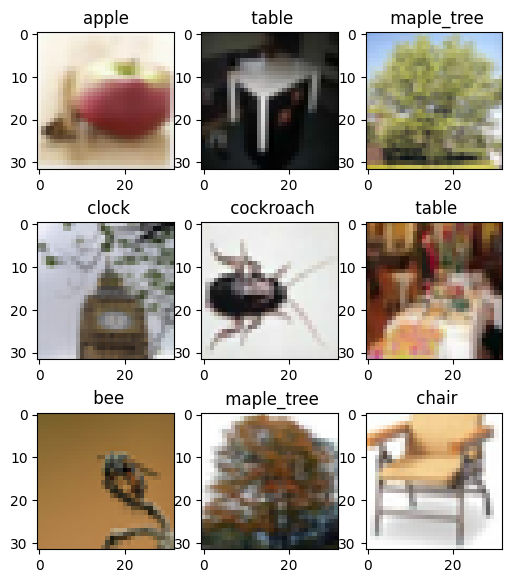

In [14]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 7))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [15]:
#convert class labels into integers
values = np.unique(y_val)
values = np.sort(values)

y_val_to20 = np.zeros(len(y_val), dtype=int)
for i in range (y_val.shape[0]):
  y_val_to20[i] =  np.where(values == y_val[i])[0][0]

y_train_to20 = np.zeros(len(y_train), dtype=int)
for i in range (y_train.shape[0]):
  y_train_to20[i] =  np.where(values == y_train[i])[0][0]

y_test_to20 = np.zeros(len(y_test), dtype=int)
for i in range (y_test.shape[0]):
  y_test_to20[i] =  np.where(values == y_test[i])[0][0]


## Ερώτημα 1
---
### Βήμα 1: Σχεδίαση και εκπαίδευση των μοντέλων

 Σχεδίαστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας τον ίδιο αλγορίθμο βελτιστοποίησης ([optimizer](https://keras.io/api/optimizers/)), την ίδια συνάρτηση κόστους [loss function](https://keras.io/api/losses/), το ίδιο μέγεθος παρτίδας (batch size) και 50 εποχές (epochs) `*`.

 Για την εκτίμηση της απόδοσης των μοντέλων να χρησιμοποιήσετε ως μετρική ([metrics](https://keras.io/api/metrics/)) την F1-score.


`*`
 Μπορείτε να πειραματιστείτε με τον optimizer, την loss function και το batch size για τα 4 μοντέλα πριν καταλήξετε στην τελική σας κοινή, για όλα τα μοντέλα επιλογή.


---
  
### Βήμα 2: Αξιολόγηση των μοντέλων

α. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε στο Βήμα 1, απεικονίστε σε κοινό διάγραμμα τα F1-scores εκπαίδευσης και επικύρωσης στο σύνολο των εποχών.

β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων.
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
---

### Βήμα 3: Αξιολόγηση F1-score
Αξιολογήστε τα F1-scores, χρησιμοποιώντας το σύνολο ελέγχου σας (test set).

---

In [16]:
def LeNet(optimizer,loss):
  LeNet = models.Sequential()
  LeNet.add(layers.Conv2D(filters=6, kernel_size=5,activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
  LeNet.add(layers.AvgPool2D(pool_size=2, strides=2))
  LeNet.add(layers.Conv2D(filters=16, kernel_size=5,activation='sigmoid'))
  LeNet.add(layers.AvgPool2D(pool_size=2, strides=2))
  LeNet.add(layers.Flatten())
  LeNet.add(layers.Dense(120, activation='sigmoid'))
  LeNet.add(layers.Dense(84, activation='sigmoid'))
  LeNet.add(layers.Dense(20))
  LeNet.compile(optimizer=optimizer, loss= loss, metrics=["accuracy"])
  return LeNet

In [17]:
LeNet1 = LeNet('adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_LeNet1 = LeNet1.fit(x_train, y_train_to20, epochs=20, batch_size=32,validation_data=(x_val, y_val_to20))

Epoch 1/20
266/266 [==============================] - 12s 39ms/step - loss: 3.0063 - accuracy: 0.0527 - val_loss: 2.9511 - val_accuracy: 0.0767
Epoch 2/20
266/266 [==============================] - 8s 31ms/step - loss: 2.7571 - accuracy: 0.1528 - val_loss: 2.5686 - val_accuracy: 0.2187
Epoch 3/20
266/266 [==============================] - 10s 37ms/step - loss: 2.4717 - accuracy: 0.2344 - val_loss: 2.3653 - val_accuracy: 0.2693
Epoch 4/20
266/266 [==============================] - 11s 43ms/step - loss: 2.3371 - accuracy: 0.2731 - val_loss: 2.2760 - val_accuracy: 0.2840
Epoch 5/20
266/266 [==============================] - 13s 48ms/step - loss: 2.2527 - accuracy: 0.3021 - val_loss: 2.2098 - val_accuracy: 0.3093
Epoch 6/20
266/266 [==============================] - 8s 30ms/step - loss: 2.1913 - accuracy: 0.3240 - val_loss: 2.1892 - val_accuracy: 0.3160
Epoch 7/20
266/266 [==============================] - 9s 35ms/step - loss: 2.1335 - accuracy: 0.3425 - val_loss: 2.1210 - val_accuracy: 0.

In [20]:
def AlexNet(optimizer,loss):
  AlexNet = models.Sequential()
  AlexNet.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(32, 32, 3)))
  AlexNet.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'))
  AlexNet.add(layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  AlexNet.add(layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'))
  AlexNet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'))
  AlexNet.add(layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
  AlexNet.add(layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(layers.Flatten())
  AlexNet.add(layers.Dense(4096, activation='relu'))
  AlexNet.add(layers.Dropout(0.5))
  AlexNet.add(layers.Dense(4096, activation='relu'))
  AlexNet.add(layers.Dropout(0.5))
  AlexNet.add(layers.Dense(20))
  AlexNet.compile(optimizer=optimizer, loss= loss, metrics=['accuracy'])
  return AlexNet

In [21]:
AlexNet1 = AlexNet('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
historty_AlexNet1 = AlexNet1.fit(x_train, y_train_to20,  epochs=5, batch_size=32, validation_data=(x_val, y_val_to20))

Epoch 1/5
266/266 [==============================] - 1517s 6s/step - loss: 3.0101 - accuracy: 0.0452 - val_loss: 2.9974 - val_accuracy: 0.0453
Epoch 2/5
266/266 [==============================] - 1500s 6s/step - loss: 2.9969 - accuracy: 0.0496 - val_loss: 2.9980 - val_accuracy: 0.0427
Epoch 3/5
266/266 [==============================] - 1492s 6s/step - loss: 2.9966 - accuracy: 0.0473 - val_loss: 2.9978 - val_accuracy: 0.0427
Epoch 4/5
266/266 [==============================] - 1475s 6s/step - loss: 2.9964 - accuracy: 0.0455 - val_loss: 2.9974 - val_accuracy: 0.0427
Epoch 5/5
266/266 [==============================] - 1496s 6s/step - loss: 2.9963 - accuracy: 0.0451 - val_loss: 2.9973 - val_accuracy: 0.0413


In [24]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size=3,padding='same', activation='relu'))
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

def VGG(arch,optimizer,loss):
  vgg = models.Sequential()
  vgg.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(32, 32, 3)))
  vgg.add(layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  vgg.add(tf.keras.layers.BatchNormalization(momentum=0.8))
  vgg.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  for (num_convs, num_channels) in arch:
    vgg.add(vgg_block(num_convs, num_channels))
  vgg.add(tf.keras.layers.Flatten())
  vgg.add(tf.keras.layers.Dense(4096, activation='relu'))
  vgg.add(tf.keras.layers.Dropout(0.5))
  vgg.add(tf.keras.layers.Dense(4096, activation='relu'))
  vgg.add(tf.keras.layers.Dropout(0.5))
  vgg.add(tf.keras.layers.Dense(20))
  vgg.compile(optimizer=optimizer,loss=loss, metrics=['accuracy'])
  return vgg

In [ ]:
vgg1 = VGG(((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)),'adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_vgg1 = vgg1.fit(x_train, y_train_to20, epochs=5, batch_size=32,validation_data=(x_val, y_val_to20))

Epoch 1/5
266/266 [==============================] - 3950s 15s/step - loss: 3.0601 - accuracy: 0.0492 - val_loss: 2.9987 - val_accuracy: 0.0427
Epoch 2/5
266/266 [==============================] - 3986s 15s/step - loss: 2.9976 - accuracy: 0.0504 - val_loss: 2.9974 - val_accuracy: 0.0467
Epoch 3/5
266/266 [==============================] - 3924s 15s/step - loss: 2.9968 - accuracy: 0.0469 - val_loss: 2.9970 - val_accuracy: 0.0427
Epoch 4/5
266/266 [==============================] - 3931s 15s/step - loss: 2.9966 - accuracy: 0.0456 - val_loss: 2.9975 - val_accuracy: 0.0427
Epoch 5/5
105/266 [==========>...................] - ETA: 37:25 - loss: 2.9959 - accuracy: 0.0521

In [18]:
def MyCNN(optimizer,loss):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(20))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [19]:
MyCNN1 = MyCNN('adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN1 = MyCNN1.fit(x_train, y_train_to20, epochs=20, batch_size=32,validation_data=(x_val, y_val_to20))

Epoch 1/20
266/266 [==============================] - 15s 50ms/step - loss: 2.5188 - accuracy: 0.2225 - val_loss: 2.2048 - val_accuracy: 0.3327
Epoch 2/20
266/266 [==============================] - 12s 44ms/step - loss: 1.9833 - accuracy: 0.3935 - val_loss: 1.8837 - val_accuracy: 0.4260
Epoch 3/20
266/266 [==============================] - 14s 54ms/step - loss: 1.7757 - accuracy: 0.4571 - val_loss: 1.7606 - val_accuracy: 0.4713
Epoch 4/20
266/266 [==============================] - 12s 44ms/step - loss: 1.6396 - accuracy: 0.4979 - val_loss: 1.6554 - val_accuracy: 0.4973
Epoch 5/20
266/266 [==============================] - 16s 61ms/step - loss: 1.5173 - accuracy: 0.5304 - val_loss: 1.5304 - val_accuracy: 0.5267
Epoch 6/20
266/266 [==============================] - 13s 49ms/step - loss: 1.4043 - accuracy: 0.5681 - val_loss: 1.5696 - val_accuracy: 0.5227
Epoch 7/20
266/266 [==============================] - 13s 48ms/step - loss: 1.3160 - accuracy: 0.5888 - val_loss: 1.4935 - val_accuracy:

In [23]:
def acc_plot(history,model):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(x_test,  y_test_to20, verbose=2)
  return test_loss, test_acc

63/63 - 1s - loss: 1.8739 - accuracy: 0.4315 - 820ms/epoch - 13ms/step


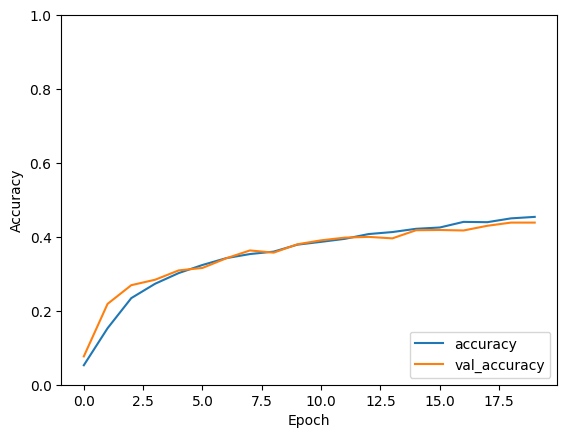

In [24]:
lenet_loss, lenet_acc = acc_plot(history_LeNet1, LeNet1)

63/63 - 81s - loss: 2.9959 - accuracy: 0.0500 - 81s/epoch - 1s/step


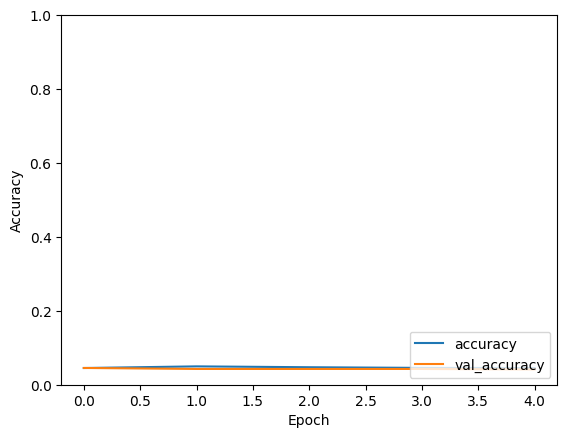

In [25]:
alexnet_loss, alexnet_acc = acc_plot(historty_AlexNet1,AlexNet1)

63/63 - 1s - loss: 1.8473 - accuracy: 0.5725 - 740ms/epoch - 12ms/step


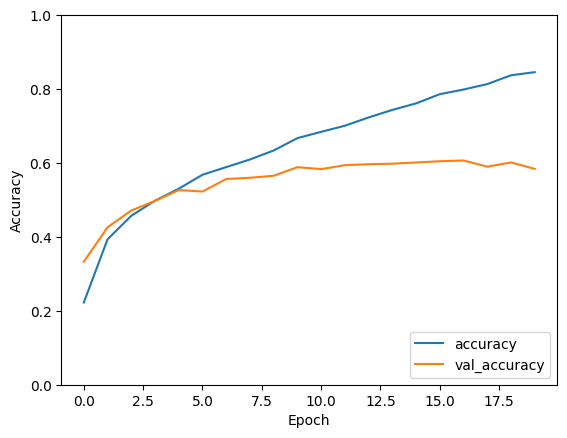

In [26]:
mycnn_loss, mycnn_acc = acc_plot(history_MyCNN1,MyCNN1)

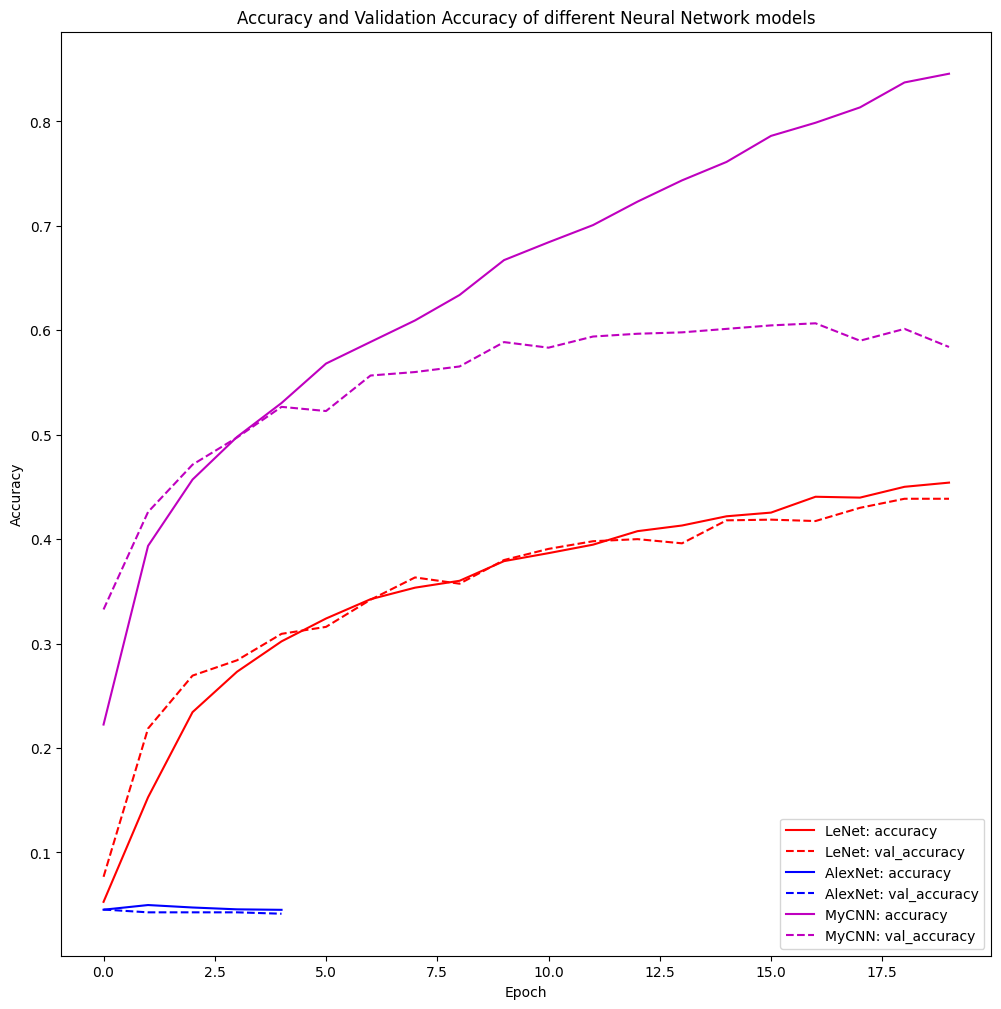

In [27]:

names = ['LeNet', 'AlexNet','MyCNN']
histories = [history_LeNet1, historty_AlexNet1, history_MyCNN1]

fig = plt.figure(figsize=(12,12))
plt.title("Accuracy and Validation Accuracy of different Neural Network models")
i=0
color_arr = ['r','b','m','g','y']
for history in histories:
  plt.plot(history.history['accuracy'], label=names[i]+': accuracy', color=color_arr[i%5])
  plt.plot(history.history['val_accuracy'], linestyle='dashed', label = names[i] + ': val_accuracy',color=color_arr[i%5])
  i+=1

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Ζητειται η αξιολογηση των αποτελεσματων ως προς τα παρακατβ

1.   Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
2.   Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
3.   Επίδραση του μεγέθους δέσμης (batch size)




1. Ένα μεγαλύτερο σύνολο δεδομένων μπορεί να βελτιώσει την απόδοση του μοντέλου. Αν το μοντέλο έχει περιορισμένο σύνολο δεδομένων, μπορεί να προκύψουν προβλήματα όπως η υπερεκπαίδευση (overfitting) ή η αδυναμία γενίκευσης των μοντέλων. Όσο μεγαλύτερο είναι το πλήθος των κλάσεων τοσο πιο πολύπλοκο γίνεται το πρόβλημα κατηγοριποίησης.

2. Ο αλγόριθμος βελτιστοποίσης επηρεάζει την εκπαίδευση του μοντέλου οσον αφορά την ταχύτητα σύγκλισης, την αποφυγή overfitting και η επιλογή κατάλληλου αλγορίθμου εξαρτάται απο τις παραμέτρους του προβλήματος. Μέσα απο δοκιμές παρατηρήσαμε πως ο adam optimizer σύγκλινε σχετικά γρήγορα σε ψηλές τιμές accuracy ενώ ο sgd χρειαζόταν περισσότερες εποχές για να συγκλίνει. Υπαρχουν και αλλοι optimizers, οπως ο rmsprop, ο sgd με momentum κλπ αλλά δεν πετυχαίνανε υψηλές αποδόσεις

3. Το batch size είναι σημαντικό γιατί επηρεάζει τόσο τον χρόνο εκπαίδευσης όσο και τη γενίκευση του μοντέλου. Μικρο batch size επιτρέπει στο μοντέλο να μαθαίνει από κάθε μεμονωμένο παράδειγμα, αλλά απαιτεί περισσότερο χρόνο εκπαίδευσης (ανανεωνουμε πιο συχνα τις παραμετρους). Μεγαλύτερο μέγεθος εκπαιδεύει γρηγορότερα, αλλά μπορεί να οδηγήσει το μοντέλο στο να μην αποτυπώσει τις λεπτομέρειες των δεδομένων.

In [28]:
def evaluation(model, text):
  print("--------------------------------------")
  print("\033[1m" + text + "\033[0m")
  loss, acc = model.evaluate(x_test, y_test_to20)
  print("Accuracy: ", acc, " Loss: ", loss)
  return loss, acc

In [29]:
l1_test_loss,l1_test_acc = evaluation(LeNet1,'LeNet1')

--------------------------------------
LeNet1
63/63 [==============================] - 1s 14ms/step - loss: 1.8739 - accuracy: 0.4315
Accuracy:  0.43149998784065247  Loss:  1.8738592863082886


In [30]:
a1_test_loss,a1_test_acc = evaluation(AlexNet1,'AlexNet1')

--------------------------------------
AlexNet1
63/63 [==============================] - 81s 1s/step - loss: 2.9959 - accuracy: 0.0500
Accuracy:  0.05000000074505806  Loss:  2.9958527088165283


In [31]:
m1_test_loss,m1_test_acc = evaluation(MyCNN1,'MyCNN1')

--------------------------------------
MyCNN1
63/63 [==============================] - 2s 28ms/step - loss: 1.8473 - accuracy: 0.5725
Accuracy:  0.5724999904632568  Loss:  1.8472641706466675



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), ώστε το μοντέλο σας να γενικεύει καλύτερα, όπως:

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator))

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου

---


In [38]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1), #maximum degree of rotation
    layers.experimental.preprocessing.RandomZoom(0.1), #maximum zoom range
  ]
)

def MyCNN_optim(optimizer,loss):
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model


In [40]:
MyCNN_opt = MyCNN_optim('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_opt = MyCNN_opt.fit(x_train, y_train_to20, epochs=50,batch_size=32,validation_data=(x_val, y_val_to20))

Epoch 1/50
266/266 [==============================] - 15s 49ms/step - loss: 2.7503 - accuracy: 0.1511 - val_loss: 2.3305 - val_accuracy: 0.3080
Epoch 2/50
266/266 [==============================] - 13s 49ms/step - loss: 2.3139 - accuracy: 0.2926 - val_loss: 2.0627 - val_accuracy: 0.3767
Epoch 3/50
266/266 [==============================] - 14s 54ms/step - loss: 2.1252 - accuracy: 0.3484 - val_loss: 1.9096 - val_accuracy: 0.4027
Epoch 4/50
266/266 [==============================] - 13s 50ms/step - loss: 2.0289 - accuracy: 0.3785 - val_loss: 1.8514 - val_accuracy: 0.4353
Epoch 5/50
266/266 [==============================] - 13s 50ms/step - loss: 1.9356 - accuracy: 0.4089 - val_loss: 1.7363 - val_accuracy: 0.4687
Epoch 6/50
266/266 [==============================] - 13s 48ms/step - loss: 1.8720 - accuracy: 0.4275 - val_loss: 1.6574 - val_accuracy: 0.4840
Epoch 7/50
266/266 [==============================] - 13s 47ms/step - loss: 1.8126 - accuracy: 0.4375 - val_loss: 1.6484 - val_accuracy:

Μετα απο μερικές δοκιμάς καταλήξαμε πως το καλύτερο μοντέλο περιέχει δυο Dropout Layers με 0.1 και 0.05 dropout αντίστοιχα. Χρησιμοποιήσαμε data augmentation ενω δοκιμές με Image Generation δεν βοήθησαν στην τελική αξιολόγηση του μοντέλου μας. Σημειώνεται οτι αυξήσαμε και τις εποχές εκπαίδευσης του μοντέλου μας ενώ αλλάξαμε και την τιμή του batch_size

In [45]:
def evaluation_val(model, text):
  print("--------------------------------------")
  print("\033[1m" + text + "\033[0m")
  loss, acc = model.evaluate(x_val, y_val_to20)
  print("Accuracy: ", acc, " Loss: ", loss)
  return loss, acc

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 1s 11ms/step - loss: 1.3796 - accuracy: 0.6020
Accuracy:  0.6019999980926514  Loss:  1.3796274662017822
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 1s 10ms/step - loss: 1.3753 - accuracy: 0.6007
Accuracy:  0.6006666421890259  Loss:  1.375258445739746
63/63 - 1s - loss: 1.3796 - accuracy: 0.6020 - 612ms/epoch - 10ms/step


(1.3796274662017822, 0.6019999980926514)

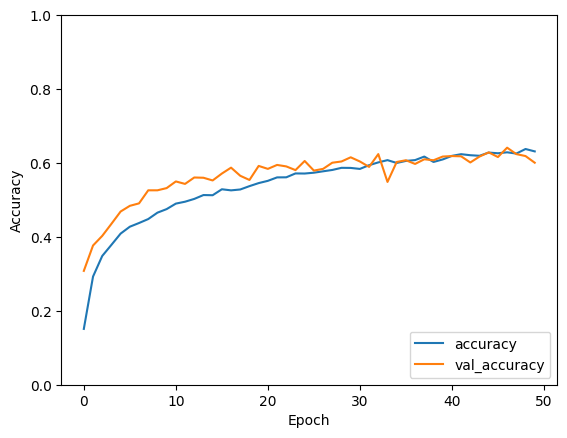

In [51]:
mycnn_opt_test_loss,mycnn_opt_test_acc = evaluation(MyCNN_opt,'MyCNN optimized test set')
mycnn_opt_val_loss,mycnn_opt_val_acc = evaluation_val(MyCNN_opt,'MyCNN optimized validation')
acc_plot(history_MyCNN_opt, MyCNN_opt)


## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς το F1 score στην αντιμετώπιση της υπερεκπαίδεσης.

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

α. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

β. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

---
### Βήμα 2: Αξιολόγηση

Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου.

---

In [53]:
pretrained_vgg19 = tf.keras.applications.VGG19(include_top=False, input_shape=(32,32,3))
pretrained_vgg19.trainable=False
pretrained_eff = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(32,32,3))
pretrained_eff.trainable=False

In [54]:
def MyCNN_vgg19(optimizer,loss):
  model = models.Sequential()
  model.add(pretrained_vgg19)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

def MyCNN_eff(optimizer,loss):
  model = models.Sequential()

  model.add(pretrained_eff)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [56]:
MyCNN_19 = MyCNN_vgg19('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_vgg19 = MyCNN_19.fit(x_train, y_train_to20, epochs=20,batch_size=34,validation_data=(x_val, y_val_to20))


Epoch 1/20
250/250 [==============================] - 137s 545ms/step - loss: 2.3663 - accuracy: 0.3041 - val_loss: 1.8350 - val_accuracy: 0.4740
Epoch 2/20
250/250 [==============================] - 156s 624ms/step - loss: 1.8608 - accuracy: 0.4426 - val_loss: 1.6025 - val_accuracy: 0.5387
Epoch 3/20
250/250 [==============================] - 137s 547ms/step - loss: 1.6995 - accuracy: 0.4844 - val_loss: 1.4947 - val_accuracy: 0.5560
Epoch 4/20
250/250 [==============================] - 134s 536ms/step - loss: 1.6106 - accuracy: 0.5069 - val_loss: 1.4502 - val_accuracy: 0.5627
Epoch 5/20
250/250 [==============================] - 135s 542ms/step - loss: 1.5423 - accuracy: 0.5280 - val_loss: 1.4050 - val_accuracy: 0.5687
Epoch 6/20
250/250 [==============================] - 135s 542ms/step - loss: 1.4893 - accuracy: 0.5451 - val_loss: 1.4024 - val_accuracy: 0.5627
Epoch 7/20
250/250 [==============================] - 134s 535ms/step - loss: 1.4499 - accuracy: 0.5549 - val_loss: 1.3636 -

In [58]:
MyCNN_effn = MyCNN_eff('adam',  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_eff = MyCNN_effn.fit(x_train, y_train_to20, epochs=20,batch_size=32,validation_data=(x_val, y_val_to20))

Epoch 1/20
266/266 [==============================] - 25s 64ms/step - loss: 2.9997 - accuracy: 0.0504 - val_loss: 2.9961 - val_accuracy: 0.0427
Epoch 2/20
266/266 [==============================] - 16s 60ms/step - loss: 2.9960 - accuracy: 0.0486 - val_loss: 2.9966 - val_accuracy: 0.0413
Epoch 3/20
266/266 [==============================] - 16s 60ms/step - loss: 2.9959 - accuracy: 0.0486 - val_loss: 2.9969 - val_accuracy: 0.0413
Epoch 4/20
266/266 [==============================] - 16s 62ms/step - loss: 2.9959 - accuracy: 0.0479 - val_loss: 2.9971 - val_accuracy: 0.0413
Epoch 5/20
266/266 [==============================] - 16s 59ms/step - loss: 2.9959 - accuracy: 0.0508 - val_loss: 2.9972 - val_accuracy: 0.0413
Epoch 6/20
266/266 [==============================] - 17s 63ms/step - loss: 2.9960 - accuracy: 0.0456 - val_loss: 2.9974 - val_accuracy: 0.0413
Epoch 7/20
266/266 [==============================] - 15s 57ms/step - loss: 2.9958 - accuracy: 0.0487 - val_loss: 2.9974 - val_accuracy:

Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

In [60]:
pretrained_vgg19_2 = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)
pretrained_eff_2 = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(32,32,3))

for i, layervgg in enumerate(pretrained_vgg19_2.layers):
  if (i <= 18): layervgg.trainable = False

for i, layereff in enumerate(pretrained_eff_2.layers):
  if (i <= 170): layereff.trainable = False

In [68]:
def MyCNN_vgg19_2(optimizer,loss):
  model = models.Sequential()
  model.add(pretrained_vgg19_2)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.2))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [61]:


def MyCNN_eff_2(optimizer,loss):
  model = models.Sequential()
  model.add(pretrained_eff_2)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [69]:
MyCNN_19_2 = MyCNN_vgg19_2('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_vgg19_2 = MyCNN_19_2.fit(x_train, y_train_to20, epochs=20,batch_size=32,validation_data=(x_val, y_val_to20))


Epoch 1/20
266/266 [==============================] - 306s 1s/step - loss: 2.9960 - accuracy: 0.0462 - val_loss: 2.9962 - val_accuracy: 0.0427
Epoch 2/20
266/266 [==============================] - 305s 1s/step - loss: 2.9961 - accuracy: 0.0469 - val_loss: 2.9964 - val_accuracy: 0.0453
Epoch 3/20
266/266 [==============================] - 324s 1s/step - loss: 2.9960 - accuracy: 0.0472 - val_loss: 2.9967 - val_accuracy: 0.0453
Epoch 4/20
266/266 [==============================] - 324s 1s/step - loss: 2.9960 - accuracy: 0.0479 - val_loss: 2.9966 - val_accuracy: 0.0427
Epoch 5/20
266/266 [==============================] - 302s 1s/step - loss: 2.9960 - accuracy: 0.0481 - val_loss: 2.9968 - val_accuracy: 0.0427
Epoch 6/20
266/266 [==============================] - 303s 1s/step - loss: 2.9960 - accuracy: 0.0508 - val_loss: 2.9970 - val_accuracy: 0.0427
Epoch 7/20
266/266 [==============================] - 303s 1s/step - loss: 2.9960 - accuracy: 0.0496 - val_loss: 2.9970 - val_accuracy: 0.0427

In [64]:
MyCNN_effn_2 = MyCNN_eff_2('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_effn_2 = MyCNN_effn_2.fit(x_train, y_train_to20, epochs=20,batch_size=32,validation_data=(x_val, y_val_to20))


Exception ignored in: <function _xla_gc_callback at 0x7c56f96115a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/20
266/266 [==============================] - 59s 172ms/step - loss: 3.0264 - accuracy: 0.0665 - val_loss: 3.0223 - val_accuracy: 0.0680
Epoch 2/20
266/266 [==============================] - 47s 176ms/step - loss: 2.9180 - accuracy: 0.0880 - val_loss: 2.9928 - val_accuracy: 0.0693
Epoch 3/20
266/266 [==============================] - 43s 163ms/step - loss: 2.8472 - accuracy: 0.1139 - val_loss: 2.9956 - val_accuracy: 0.0453
Epoch 4/20
266/266 [==============================] - 45s 169ms/step - loss: 2.7882 - accuracy: 0.1346 - val_loss: 2.9956 - val_accuracy: 0.0453
Epoch 5/20
266/266 [==============================] - 46s 171ms/step - loss: 2.7480 - accuracy: 0.1440 - val_loss: 2.9959 - val_accuracy: 0.0453
Epoch 6/20
266/266 [==============================] - 42s 159ms/step - loss: 2.7093 - accuracy: 0.1593 - val_loss: 2.9962 - val_accuracy: 0.0467
Epoch 7/20
266/266 [==============================] - 44s 166ms/step - loss: 2.6785 - accuracy: 0.1653 - val_loss: 2.9963 - val_ac

Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 29s 465ms/step - loss: 1.3431 - accuracy: 0.5930
Accuracy:  0.5929999947547913  Loss:  1.3430613279342651
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 20s 415ms/step - loss: 1.2823 - accuracy: 0.5947
Accuracy:  0.5946666598320007  Loss:  1.282346248626709
63/63 - 26s - loss: 1.3431 - accuracy: 0.5930 - 26s/epoch - 417ms/step


(1.3430613279342651, 0.5929999947547913)

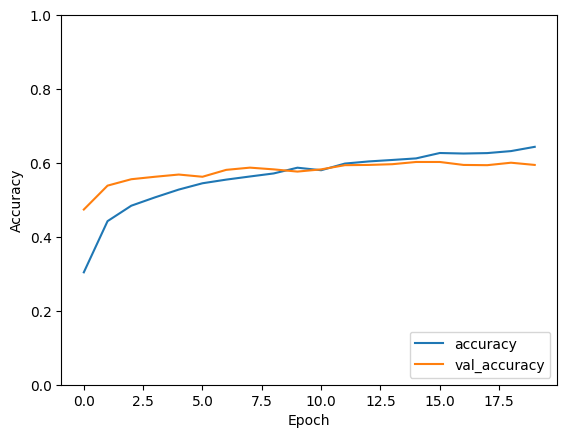

In [70]:

mycnn_19_test_loss,mycnn_19_test_acc = evaluation(MyCNN_19,'MyCNN optimized test set')
mycnn_19_val_loss,mycnn_19_val_acc = evaluation_val(MyCNN_19,'MyCNN optimized validation')
acc_plot(history_MyCNN_vgg19, MyCNN_19)

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 27s 426ms/step - loss: 2.9959 - accuracy: 0.0500
Accuracy:  0.05000000074505806  Loss:  2.9958508014678955
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 20s 431ms/step - loss: 2.9973 - accuracy: 0.0413
Accuracy:  0.041333332657814026  Loss:  2.9973177909851074
63/63 - 28s - loss: 2.9959 - accuracy: 0.0500 - 28s/epoch - 443ms/step


(2.9958508014678955, 0.05000000074505806)

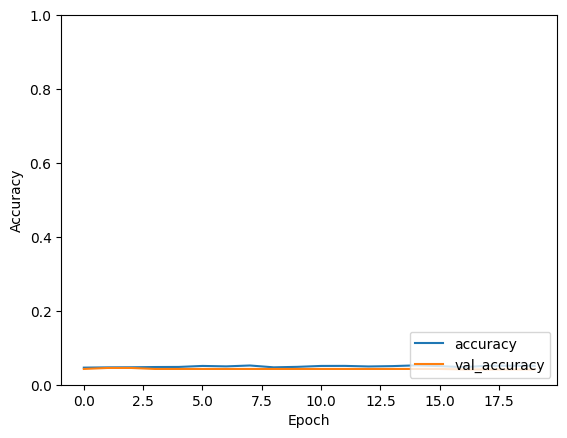

In [71]:
mycnn_19_2_test_loss,mycnn_19_2_test_acc = evaluation(MyCNN_19_2,'MyCNN optimized test set')
mycnn_19_2_val_loss,mycnn_19_2_val_acc = evaluation_val(MyCNN_19_2,'MyCNN optimized validation')
acc_plot(history_MyCNN_vgg19_2, MyCNN_19_2)

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 4s 57ms/step - loss: 2.9959 - accuracy: 0.0500
Accuracy:  0.05000000074505806  Loss:  2.995867967605591
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 2s 43ms/step - loss: 2.9974 - accuracy: 0.0413
Accuracy:  0.041333332657814026  Loss:  2.997424364089966
63/63 - 3s - loss: 2.9959 - accuracy: 0.0500 - 3s/epoch - 51ms/step


(2.995867967605591, 0.05000000074505806)

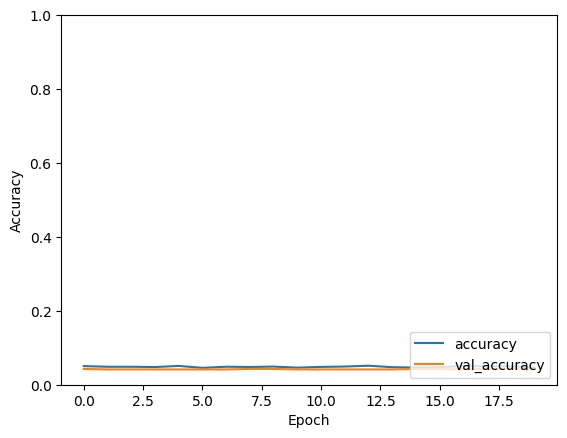

In [72]:
mycnn_eff_test_loss,mycnn_eff_test_acc = evaluation(MyCNN_effn,'MyCNN optimized test set')
mycnn_eff_val_loss,mycnn_eff_val_acc = evaluation_val(MyCNN_effn,'MyCNN optimized validation')
acc_plot(history_MyCNN_eff, MyCNN_effn)

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 3s 43ms/step - loss: 2.9960 - accuracy: 0.0500
Accuracy:  0.05000000074505806  Loss:  2.9959828853607178
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 2s 43ms/step - loss: 2.9966 - accuracy: 0.0453
Accuracy:  0.04533333331346512  Loss:  2.9966259002685547
63/63 - 2s - loss: 2.9960 - accuracy: 0.0500 - 2s/epoch - 40ms/step


(2.9959828853607178, 0.05000000074505806)

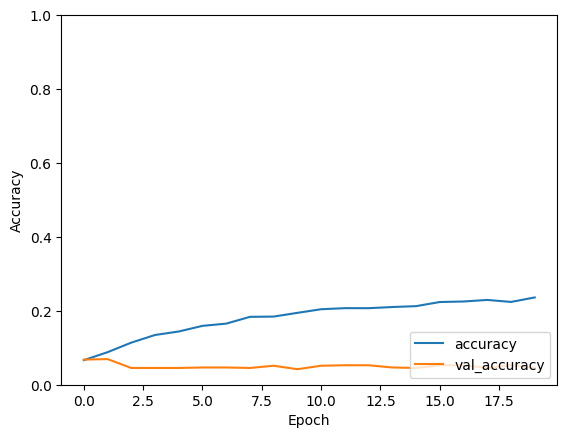

In [73]:

mycnn_eff_2_test_loss,mycnn_eff_2_test_acc = evaluation(MyCNN_effn_2,'MyCNN optimized test set')
mycnn_ef_2_val_loss,mycnn_eff_2_val_acc = evaluation_val(MyCNN_effn_2,'MyCNN optimized validation')
acc_plot(history_MyCNN_effn_2, MyCNN_effn_2)

Παίρνωντας ενα pretrained μοντέλο μπορούμε να αξιοποιήσουμε την εκπαίδευσή τους και να το προσαρμόσουμε στις ανάγκες του προβλήματος μας. Παρατηρήσαμε οτι το vgg χωρίς επανεκπαίδευση πετυχαίνει αρκετά καλό accuracy, αν και δεν ξεπερνάει τις μετρικές του μοντέλο μας. Με επανεκπαίδευση πετυχαίνει πολύ καλό train accuracy αλλα παρόμοιο validation accuracy. Αντίθετα το EfficientNet χωρίς επανεκπαίδευση δεν τα καταφέρνει καλά στο συγκεκριμένο πρόβλημά. Ακόμα και αν με επανεκπαίδευση πετυχαίνει καλό train accuracy το validation accuracy συνεχίζει να είναι χαμηλό μαρτυρώντας πρόβλημα υπερεκπαίδευσης

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
